In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [275]:
data = pd.read_excel('Data set Dinda.xlsx')
data.head()

,No,Hari,Hama,Curah Hujan,Pupuk,Hasil Panen,Harga
0,1,1,40,65,70,75,11000
1,2,2,40,65,70,75,11000
2,3,3,40,65,70,75,11000
3,4,4,40,65,70,75,11000
4,5,5,40,65,70,75,11000


In [276]:
column = ['Hama','Curah Hujan','Pupuk','Hasil Panen','Harga']
data = data[column]

In [71]:
data.isnull().sum().sort_values(ascending=False)

Hama           0
Curah Hujan    0
Pupuk          0
Hasil Panen    0
Harga          0
dtype: int64

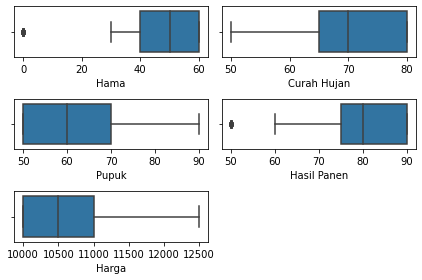

In [181]:
fig, axs = plt.subplots(3, 2)

# Plot the boxplot for the first data using seaborn in the first subplot (index 0)
sns.boxplot(data=data,x='Hama', ax=axs[0,0])
sns.boxplot(data=data,x='Curah Hujan', ax=axs[0,1])
sns.boxplot(data=data,x='Pupuk', ax=axs[1,0])
sns.boxplot(data=data,x='Hasil Panen', ax=axs[1,1])
sns.boxplot(data=data,x='Harga', ax=axs[2,0])
axs[2, 1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

In [301]:
q1 = data['Hama'].quantile(0.25)
q3 = data['Hama'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
data = data[(data['Hama'] >= lower_bound) ]

In [182]:
q1_Hama = data['Hama'].quantile(0.25)
q3_Hama = data['Hama'].quantile(0.75)
iqr = q3_Hama - q1_Hama
lower_bound = q1_Hama - 1.5 * iqr
median = data['Hama'].median()
data['Hama'] = data['Hama'].apply(lambda x: median if x < lower_bound else x)

In [183]:
q1_panen = data['Hasil Panen'].quantile(0.25)
q3_panen = data['Hasil Panen'].quantile(0.75)
iqr_panen = q3_panen - q1_panen
lower_bound_panen = q1_panen - 1.5 * iqr_panen
median = data['Hasil Panen'].median()
data['Hasil Panen'] = data['Hasil Panen'].apply(lambda x: median if x < lower_bound_panen else x)

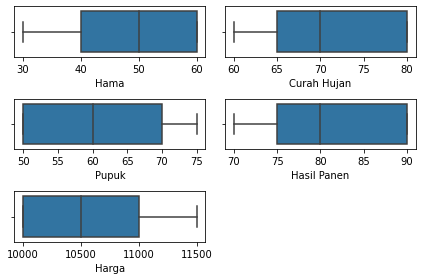

In [246]:
fig, axs = plt.subplots(3, 2)

# Plot the boxplot for the first data using seaborn in the first subplot (index 0)
sns.boxplot(data=data,x='Hama', ax=axs[0,0])
sns.boxplot(data=data,x='Curah Hujan', ax=axs[0,1])
sns.boxplot(data=data,x='Pupuk', ax=axs[1,0])
sns.boxplot(data=data,x='Hasil Panen', ax=axs[1,1])
sns.boxplot(data=data,x='Harga', ax=axs[2,0])
axs[2, 1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

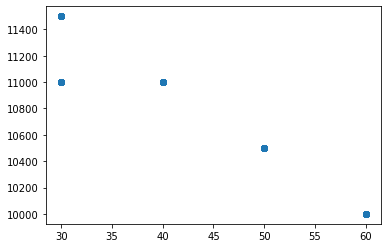

In [314]:
plt.scatter(x=data['Hama'],y=data['Harga'])
plt.show()

In [302]:
X = np.array(data[['Hama', 'Curah Hujan', 'Pupuk', 'Hasil Panen']])
y = np.array(data['Harga'])

In [278]:
X

array([[40, 65, 70, 75],
       [40, 65, 70, 75],
       [40, 65, 70, 75],
       ...,
       [ 0, 50, 90, 50],
       [ 0, 50, 90, 50],
       [ 0, 50, 90, 50]], dtype=int64)

In [152]:
y

array([11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000,
       11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000,
       11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000,
       11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000, 11000,
       11000, 11000, 11000, 11000, 11000, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10000, 10000, 10000, 10000,
       10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
       10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
       10000, 10000, 10000, 10000, 10000, 10000, 10000, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500, 10500,
       10500, 10500, 10500, 11000, 11000, 11000, 11000, 11000, 11000,
       11000, 11000,

In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standardized = scaler.fit_transform(X)

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print(X_train.shape)
print(y_train.shape)

(265, 4)
(265,)


In [203]:
X_train

array([[ 0.15271994,  0.08400723, -0.27306703, -0.0503019 ],
       [ 1.23074304,  1.26999166, -1.1790959 ,  1.34267376],
       [-0.92530316, -0.50898498,  0.63296184, -0.74678973],
       [-0.92530316, -0.50898498,  0.63296184, -0.74678973],
       [-0.92530316, -0.50898498,  0.63296184, -0.74678973],
       [-0.92530316, -0.50898498,  0.63296184, -0.74678973],
       [ 0.15271994,  0.08400723, -0.27306703, -0.0503019 ],
       [ 1.23074304,  1.26999166, -1.1790959 ,  1.34267376],
       [-0.92530316, -0.50898498,  0.63296184, -0.74678973],
       [-0.92530316, -0.50898498,  0.63296184, -0.74678973],
       [ 0.15271994, -2.28796162,  2.44501958, -0.0503019 ],
       [-0.92530316, -0.50898498,  0.63296184, -0.74678973],
       [ 1.23074304,  1.26999166, -1.1790959 ,  1.34267376],
       [ 0.15271994,  0.08400723, -0.27306703, -0.0503019 ],
       [ 1.23074304,  1.26999166, -1.1790959 ,  1.34267376],
       [ 1.23074304,  1.26999166, -1.1790959 ,  1.34267376],
       [ 0.15271994,  0.

In [389]:
regr = LinearRegression()
regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.9943251113785364

In [390]:
y_pred = regr.predict(X_test)
mean_squared_error(y_test, y_pred)

910.2071301968757

In [378]:
mean_absolute_error(y_test, y_pred)

18.789650499759

In [379]:
y_pred

array([11029.55179773, 11029.55179773, 10000.        , 11029.55179773,
       10000.        , 10483.17189296, 11029.55179773, 10483.17189296,
       10483.17189296, 10000.        , 10000.        , 10483.17189296,
       10483.17189296, 10483.17189296, 11029.55179773, 10483.17189296,
       10000.        , 10000.        , 11029.55179773, 11029.55179773,
       11029.55179773, 10000.        , 10483.17189296, 10000.        ,
       10483.17189296, 11029.55179773, 10483.17189296, 10000.        ,
       11029.55179773, 10483.17189296, 11029.55179773, 10483.17189296,
       10000.        , 10000.        , 11348.54703661, 10000.        ,
       10483.17189296, 10000.        , 11029.55179773, 10483.17189296,
       10000.        , 10000.        , 10483.17189296, 10000.        ,
       10483.17189296, 11029.55179773, 11029.55179773, 11029.55179773,
       11121.16237071, 10483.17189296, 11029.55179773, 10000.        ,
       10000.        , 10483.17189296, 11029.55179773, 10483.17189296,
      

In [380]:
y_test

array([11000, 11000, 10000, 11000, 10000, 10500, 11000, 10500, 10500,
       10000, 10000, 10500, 10500, 10500, 11000, 10500, 10000, 10000,
       11000, 11000, 11000, 10000, 10500, 10000, 10500, 11000, 10500,
       10000, 11000, 10500, 11000, 10500, 10000, 10000, 11500, 10000,
       10500, 10000, 11000, 10500, 10000, 10000, 10500, 10000, 10500,
       11000, 11000, 11000, 11000, 10500, 11000, 10000, 10000, 10500,
       11000, 10500, 10500, 10500, 10500, 10500, 10000, 10500, 10500,
       10500, 10000, 11000, 10500], dtype=int64)

In [148]:
y_pred = regr.predict([[40, 65, 70, 75]])
y_pred

array([11028.22925577])

In [145]:
import pickle
filename = 'Trialmodel.pkl'
pickle.dump(regr, open(filename, 'wb'))